In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import uproot4
import pandas as pd


In [2]:
path_to_hists = "F:/Manchester/Data/run1_backup/" 
dt_file = ['LYAttenuation','LYDown','LYRayleigh','Recomb','SCE','WireModdEdX','WireModThetaXZ','WireModThetaYZ_withSigmaSplines','WireModThetaYZ_withoutSigmaSplines','WireModX','WireModYZ','standard']
dt_variaition = ['LYAttenuation','LYDown','LYRayleigh','Recomb','SCE','WireModdEdX','WireModThetaXZ','WireModThetaYZ_withSigmaSplines','WireModThetaYZ_withoutSigmaSplines','WireModX','WireModYZ']
pot_exp_R1 = 2e+20
names=locals()

In [3]:
for var in dt_file:
    file_name=str(var)+"_run1.root"
    print("Opening file: ", file_name)
    file = uproot4.open(path_to_hists+file_name)
    tree = file["singlephotonana;1/vertex_tree;1"]
    pot= file["singlephotonana;1/pot_tree;1"]

    shwr_max_energy = tree['reco_shower_energy_max'].array(library='ak')
    shower_number = tree['reco_asso_showers'].array(library="ak")
    track_number = tree['reco_asso_tracks'].array(library='ak')
    pot_number = pot['POT'].array(library='ak')
    shwer_NC_CC_check_std = tree['mctruth_cc_or_nc'].array(library='ak')
    shwer_pi0_check_std = tree['mctruth_num_exiting_pi0'].array(library='ak')

    shower_energy = []
    shower_energy_cut1 = []
    shower_energy_cut2 = []

    index=0
    for i,j in zip(shower_number,track_number):
        if(i == 1 and j == 0):
            energy = shwr_max_energy[index][0]
            shower_energy_cut1.append(energy)
        index+=1


    index=0
    for i,j in zip(shower_number,track_number):
        if(i >= 1 and j == 0):
            energy = shwr_max_energy[index]
            for h in energy:
                shower_energy_cut2.append(h)
        index+=1


    for k in shwr_max_energy:
        for energy in k:
            shower_energy.append(energy)

    names['shower_energy_' + str(var)] = np.array(shower_energy)/1000
    names['shower_energy_cut1_' + str(var)] = np.array(shower_energy_cut1)/1000
    names['shower_energy_cut2_' + str(var)] = np.array(shower_energy_cut2)/1000

    names['POT_' + str(var)] = np.sum(pot_number)
    names['weigh' + str(var)] = pot_exp_R1 / np.sum(pot_number)
    print('POT of ', str(var), '=', names['POT_' + str(var)])



Opening file:  LYAttenuation_run1.root
POT of  LYAttenuation = 2.0572918473864236e+20
Opening file:  LYDown_run1.root
POT of  LYDown = 2.366238796506246e+20
Opening file:  LYRayleigh_run1.root
POT of  LYRayleigh = 2.140401098032661e+20
Opening file:  Recomb_run1.root
POT of  Recomb = 2.3960368886456897e+20
Opening file:  SCE_run1.root
POT of  SCE = 2.030826174091916e+20
Opening file:  WireModdEdX_run1.root
POT of  WireModdEdX = 1.605460520515043e+20
Opening file:  WireModThetaXZ_run1.root
POT of  WireModThetaXZ = 1.8952737650410802e+20
Opening file:  WireModThetaYZ_withSigmaSplines_run1.root
POT of  WireModThetaYZ_withSigmaSplines = 2.1362670853678845e+20
Opening file:  WireModThetaYZ_withoutSigmaSplines_run1.root
POT of  WireModThetaYZ_withoutSigmaSplines = 2.0989291350040324e+20
Opening file:  WireModX_run1.root
POT of  WireModX = 2.1914849450075606e+20
Opening file:  WireModYZ_run1.root
POT of  WireModYZ = 2.0059237851501743e+20
Opening file:  standard_run1.root
POT of  standard = 8

In [ ]:
dt_file=uproot4.open("E:/dm/dt_hists_mass_0.05.root")
dt_tree = dt_file["singlephotonana;1/vertex_tree;1"]


C:\Users\steve\AppData\Local\Temp\ipykernel_4864\403583336.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[-3,-2,0,2,3], sharex=main_ax)


<Figure size 720x504 with 0 Axes>

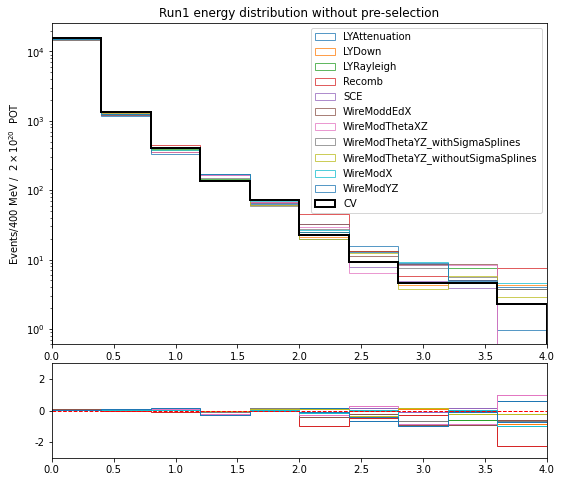

In [4]:
plt.figure(figsize=(10,7))
fig = plt.figure(figsize=(12, 8))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[-3,-2,0,2,3], sharex=main_ax)
main_ax.set_xlabel('Energy [GeV]')
main_ax.set_ylabel(r'Events/400 MeV /  $2 \times 10^{20}$  POT')
plt.xlim(0.,4.)
main_ax.set_title('Run1 energy distribution without pre-selection')
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,11))
cv = (counts_std*weighstandard)
error = np.zeros(10) 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,11))
    main_ax.hist(bins[:-1], bins, weights= names['weigh' + str(var)] * counts ,alpha=0.75, histtype='step',label=str(var),log=True)
    vars=(counts*names['weigh' + str(var)])
    ratio = (cv-vars)/cv
    x_hist.hist(bins[:-1],bins,weights=ratio,histtype='step',orientation='vertical',label=str(var)) 
 
main_ax.hist(bins_std[:-1], bins_std , weights= counts_std*weighstandard,histtype='step',lw=2,label='CV',color='black',log=True)
x_hist.axhline(y=0,ls='--',c='r',lw=1)
x_hist.set_ylim(-3,3)
#x_hist.set_yticklabels(-0.5,0.5)
main_ax.legend()
plt.show()

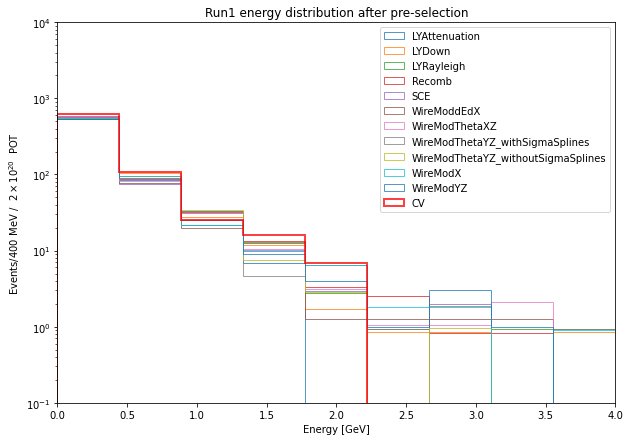

In [5]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/400 MeV /  $2 \times 10^{20}$  POT')
plt.xlim(0.,4.)
plt.ylim(0.1,10000.)
plt.title('Run1 energy distribution after pre-selection')
(counts_std_cut1, bins_std_cut1) = np.histogram(names['shower_energy_cut1_' + 'standard'], bins=np.linspace(0,4,10))
cv = (counts_std_cut1*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut1_' + str(var)], bins=np.linspace(0,4,10))
    plt.hist(bins[:-1], bins, weights= names['weigh' + str(var)] * counts ,alpha=0.75, histtype='step',lw=1,label=str(var))
plt.hist(bins_std_cut1[:-1], bins_std_cut1 ,weights= names['weigh' + 'standard'] * counts_std_cut1,alpha=0.75, histtype='step',lw=2,label='CV',color='r')
plt.legend()
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_4864\3196266964.py:16: RuntimeWarning: invalid value encountered in true_divide
  ra=(cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\3196266964.py:16: RuntimeWarning: divide by zero encountered in true_divide
  ra=(cv-vars)/cv


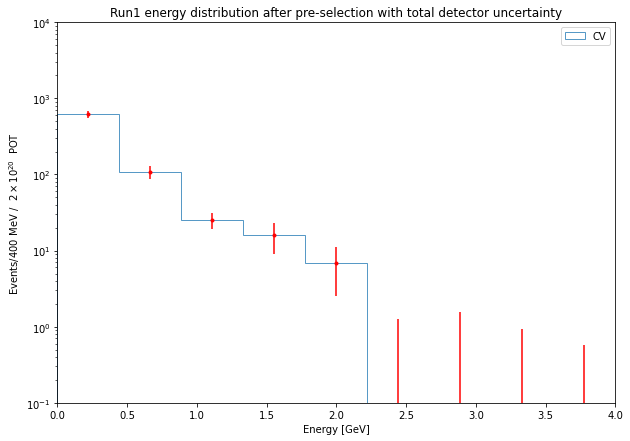

In [6]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/400 MeV /  $2 \times 10^{20}$  POT')
plt.xlim(0.,4)
plt.ylim(0.1,10000.)
plt.title('Run1 energy distribution after pre-selection with total detector uncertainty')
(counts_std, bins_std) = np.histogram(names['shower_energy_cut1_' + 'standard'], bins=np.linspace(0,4,10))
cv = (counts_std*names['weigh' + 'standard'])
error = np.zeros(9) 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut1_' + str(var)], bins=np.linspace(0,4,10))
    vars=(counts*names['weigh' + str(var)])
    vars=(counts*names['weigh' + str(var)])
    div=np.square(cv-vars)
    ra=(cv-vars)/cv
    #print('uncertainty of ',var,'=',ra)
    error=div+error
err=np.sqrt(error/10)
plt.hist(bins_std[:-1], bins_std, weights=names['weigh' + 'standard'] * counts_std ,alpha=0.75, histtype='step',label='CV')
plt.errorbar(0.5*(bins_std[:-1]+bins_std[1:]), names['weigh' + 'standard'] * counts_std, yerr=err, fmt='r.')
plt.legend()
plt.show()

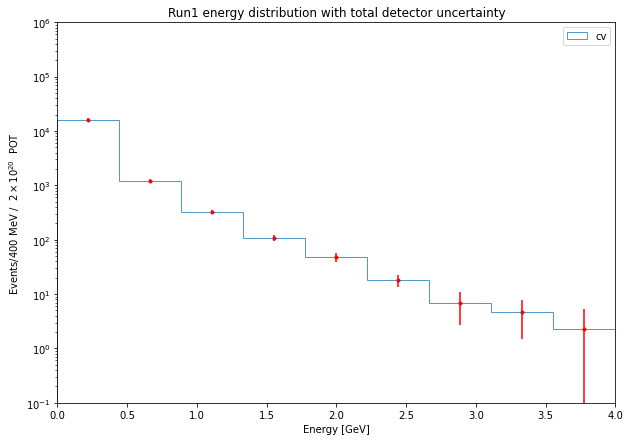

In [7]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/400 MeV /  $2 \times 10^{20}$  POT')
plt.xlim(0.,4.)
plt.ylim(0.1,1000000.)

plt.title('Run1 energy distribution with total detector uncertainty')
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,10))
cv = (counts_std*names['weigh' + 'standard'])
error = np.zeros(9) 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,10))
    vars=(counts*names['weigh' + str(var)])
    div=np.square(cv-vars)
    ra=(cv-vars)/cv
    #print('uncertainty of ',var,'=',ra)
    error=div+error
err=np.sqrt(error/8)
plt.hist(bins_std[:-1], bins_std, weights=names['weigh' + 'standard'] * counts_std ,alpha=0.75, histtype='step',label='cv')
plt.errorbar(0.5*(bins_std[:-1]+bins_std[1:]), names['weigh' + 'standard'] * counts_std, yerr=err, fmt='r.')
plt.legend()
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_4864\934018833.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\934018833.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\934018833.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\934018833.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\934018833.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\934018833.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\934018833.py:13: RuntimeWarning: divide by zero encountered in true_div

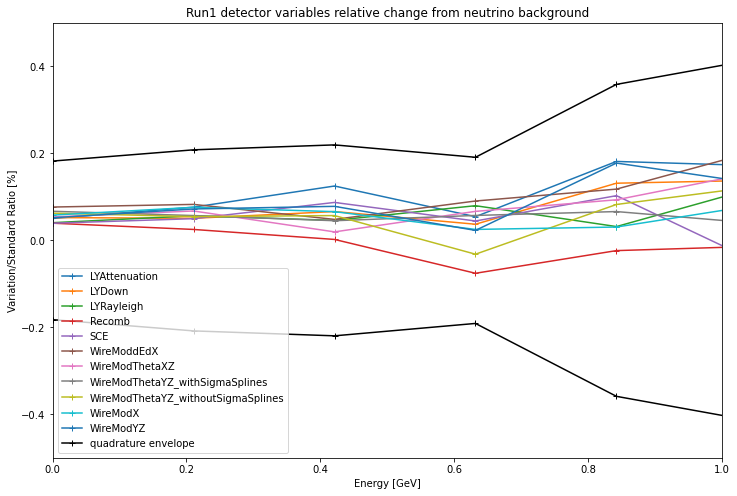

In [8]:
plt.figure(figsize=(12,8))
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Variation/Standard Ratio [%]')
plt.xlim(0.,1.0)
plt.ylim(-0.5,0.5)
plt.title('Run1 detector variables relative change from neutrino background')
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,20))
error = np.zeros(19) 
cv = (counts_std*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,20))
    vars=(counts*names['weigh' + str(var)])
    ratio = (cv-vars)/cv
    ra=np.sqrt(np.sum(np.square(ratio)))
    #print('uncertainty of ',var,'=',ra)
    plt.plot(bins[:-1],ratio,'+-',label=str(var)) 
    error=ratio**2+error
err=np.sqrt(error)
plt.plot(bins[:-1],err,'+-',c='black',label='quadrature envelope') 
plt.plot(bins[:-1],-err,'+-',c='black') 
plt.legend()
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_4864\2617089527.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\2617089527.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\2617089527.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\2617089527.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\2617089527.py:13: RuntimeWarning: invalid value encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\2617089527.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio = (cv-vars)/cv
C:\Users\steve\AppData\Local\Temp\ipykernel_4864\2617089527.py:13: RuntimeWarning: invalid value encountered in tru

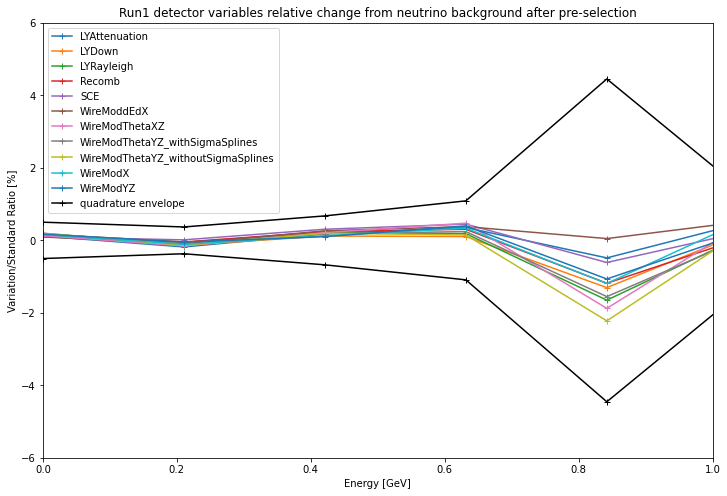

In [9]:
plt.figure(figsize=(12,8))
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Variation/Standard Ratio [%]')
plt.xlim(0.,1.0)
plt.ylim(-6,6)
plt.title('Run1 detector variables relative change from neutrino background after pre-selection')
(counts_std, bins_std) = np.histogram(names['shower_energy_cut1_' + 'standard'], bins=np.linspace(0,4,20))
error = np.zeros(19) 
cv = (counts_std*names['weigh' + 'standard'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut1_' + str(var)], bins=np.linspace(0,4,20))
    vars=(counts*names['weigh' + str(var)])
    ratio = (cv-vars)/cv
    ra=np.sqrt(np.sum(np.square(ratio)))
    #print('uncertainty of ',var,'=',ra)
    plt.plot(bins[:-1],ratio,'+-',label=str(var)) 
    error=ratio**2+error
err=np.sqrt(error)
plt.plot(bins[:-1],err,'+-',c='black',label='quadrature envelope') 
plt.plot(bins[:-1],-err,'+-',c='black') 
plt.legend()
plt.show()

In [10]:
(counts_std, bins_std) = np.histogram(names['shower_energy_' + 'standard'], bins=np.linspace(0,4,100))
cv = (counts_std*names['weigh' + 'standard'])
error = [] 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_' + str(var)], bins=np.linspace(0,4,100))
    vars=(counts*names['weigh' + str(var)])
    m=0
    ratio=[]
    for i,j,k in zip(bins,cv,vars):
        if i < 1.0:
            ra=np.square((j-k)/j)
            m+=1
            ratio.append(ra)
    rat=np.sqrt(np.sum(np.array(ratio)/m)) 
    error.append(rat)
    print('uncertainty of ',var,'=',rat*100)
err=np.sqrt(np.sum(np.square(np.array(error))/11))
print('uncertainty of total =',err*100)

uncertainty of  LYAttenuation = 17.119051655030777
uncertainty of  LYDown = 13.015117860276092
uncertainty of  LYRayleigh = 11.867948497490927
uncertainty of  Recomb = 17.126296417865365
uncertainty of  SCE = 11.51713445875736
uncertainty of  WireModdEdX = 12.48769773689853
uncertainty of  WireModThetaXZ = 11.437714622767569
uncertainty of  WireModThetaYZ_withSigmaSplines = 14.211847162606825
uncertainty of  WireModThetaYZ_withoutSigmaSplines = 14.043555101332808
uncertainty of  WireModX = 10.441179182228447
uncertainty of  WireModYZ = 12.72644281900307
uncertainty of total = 13.43739814816539


In [11]:
(counts_std, bins_std) = np.histogram(names['shower_energy_cut1_' + 'standard'], bins=np.linspace(0,4,100))
cv = (counts_std*names['weigh' + 'standard'])
error = [] 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut1_' + str(var)], bins=np.linspace(0,4,100))
    vars=(counts*names['weigh' + str(var)])
    m=0
    ratio=[]
    for i,j,k in zip(bins,cv,vars):
        if i < 0.4:
            ra=np.square((j-k)/j)
            m+=1
            ratio.append(ra)
    rat=np.sqrt(np.sum(np.array(ratio)/m)) 
    error.append(rat)
    print('uncertainty of ',var,'=',rat*100)
err=np.sqrt(np.sum(np.square(np.array(error))/11))
print('uncertainty of total =',err*100)

uncertainty of  LYAttenuation = 52.2802913951303
uncertainty of  LYDown = 78.87024700545516
uncertainty of  LYRayleigh = 63.20444650314169
uncertainty of  Recomb = 45.206645876912205
uncertainty of  SCE = 41.95171136245581
uncertainty of  WireModdEdX = 53.36913364716285
uncertainty of  WireModThetaXZ = 66.67459036908899
uncertainty of  WireModThetaYZ_withSigmaSplines = 60.96178741919546
uncertainty of  WireModThetaYZ_withoutSigmaSplines = 57.78685036608236
uncertainty of  WireModX = 70.8263447048406
uncertainty of  WireModYZ = 35.399636560487274
uncertainty of total = 58.28695792611078


In [12]:
(counts_std, bins_std) = np.histogram(names['shower_energy_cut2_' + 'standard'], bins=np.linspace(0,4,100))
cv = (counts_std*names['weigh' + 'standard'])
error = [] 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['shower_energy_cut2_' + str(var)], bins=np.linspace(0,4,100))
    vars=(counts*names['weigh' + str(var)])
    m=0
    ratio=[]
    for i,j,k in zip(bins,cv,vars):
        if i < 1.0:
            ra=np.square((j-k)/j)
            m+=1
            ratio.append(ra)
    rat=np.sqrt(np.sum(np.array(ratio)/m)) 
    error.append(rat)
    print('uncertainty of ',var,'=',rat*100)
err=np.sqrt(np.sum(np.square(np.array(error))/11))
print('uncertainty of total =',err*100)

uncertainty of  LYAttenuation = 36.17912513691743
uncertainty of  LYDown = 32.92452590484531
uncertainty of  LYRayleigh = 35.301165716922405
uncertainty of  Recomb = 49.943725889328086
uncertainty of  SCE = 33.60822582480764
uncertainty of  WireModdEdX = 29.023158064265964
uncertainty of  WireModThetaXZ = 33.12380971837156
uncertainty of  WireModThetaYZ_withSigmaSplines = 39.13150017673061
uncertainty of  WireModThetaYZ_withoutSigmaSplines = 46.64786028949773
uncertainty of  WireModX = 36.64965381030198
uncertainty of  WireModYZ = 33.06864350274961
uncertainty of total = 37.351614738107294
